<a href="https://colab.research.google.com/github/shajeeraza12/shajeeraza12/blob/main/AOATask_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Shajee Raza (Сайид мухаммад шаджи раза)
# TItle: Algorithms on graphs. Introduction to graphs and basic algorithms on graphs

The **goal** of this assignment is to implement and analyze basic graph algorithms, including Depth-First Search (DFS) for identifying connected components and Breadth-First Search (BFS) for finding the shortest path, using different graph representations. It aims to explore their efficiency, design techniques, and practical applications.

# Brief theoretical part
**Graph Theory:**
A graph consists of vertices (nodes) connected by edges (links). It can be represented using an adjacency matrix or adjacency list.

**Depth-First Search (DFS):**
DFS explores a graph by visiting a vertex and recursively visiting its neighbors before backtracking. It’s used to find connected components in a graph.

**Breadth-First Search (BFS):**
BFS explores a graph level by level, visiting all neighbors of a vertex before moving deeper. It’s used to find the shortest path between two vertices in an unweighted graph.

***Methodology:***

**Adjacency Matrix:** Efficient for dense graphs; stores edge information in a 2D matrix.

**Adjacency List:** Space-efficient for sparse graphs; stores neighbors as lists.

**DFS and BFS Algorithms:** Both use graph traversal techniques but differ in their search order (depth-first vs. level-first).

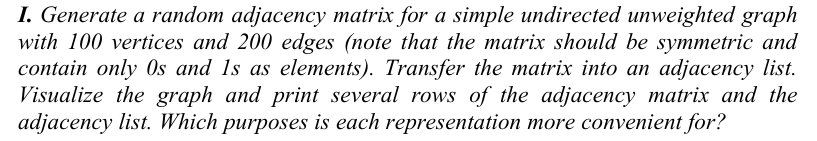


# Importing necessary libraries

In [8]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Generating a random adjacency matrix

In [10]:
# Parameters for the graph
num_vertices = 100
num_edges = 200

# Initialize an empty adjacency matrix
adj_matrix = np.zeros((num_vertices, num_vertices), dtype=int)

# Add random edges
edges_added = 0
while edges_added < num_edges:
    i, j = np.random.randint(0, num_vertices, size=2)
    if i != j and adj_matrix[i, j] == 0:  # No self-loops and no duplicate edges
        adj_matrix[i, j] = 1
        adj_matrix[j, i] = 1  # Symmetry for undirected graph
        edges_added += 1

print("Adjacency Matrix (first 5 rows):")
print(adj_matrix[:5])

Adjacency Matrix (first 5 rows):
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0

# Converting Adjacency Matrix to Adjacency List

In [5]:
# Convert adjacency matrix to adjacency list
adj_list = {i: np.where(row == 1)[0].tolist() for i, row in enumerate(adj_matrix)}

# Print the adjacency list (first 5 vertices)
print("Adjacency List (first 5 vertices):")
for vertex in list(adj_list.keys())[:5]:
    print(f"{vertex}: {adj_list[vertex]}")

Adjacency List (first 5 vertices):
0: [61, 62, 71, 88]
1: [40]
2: [13, 65, 72, 85, 93, 98]
3: [34, 35, 97]
4: [17, 31, 38, 45, 63]


# Visualizing the graph

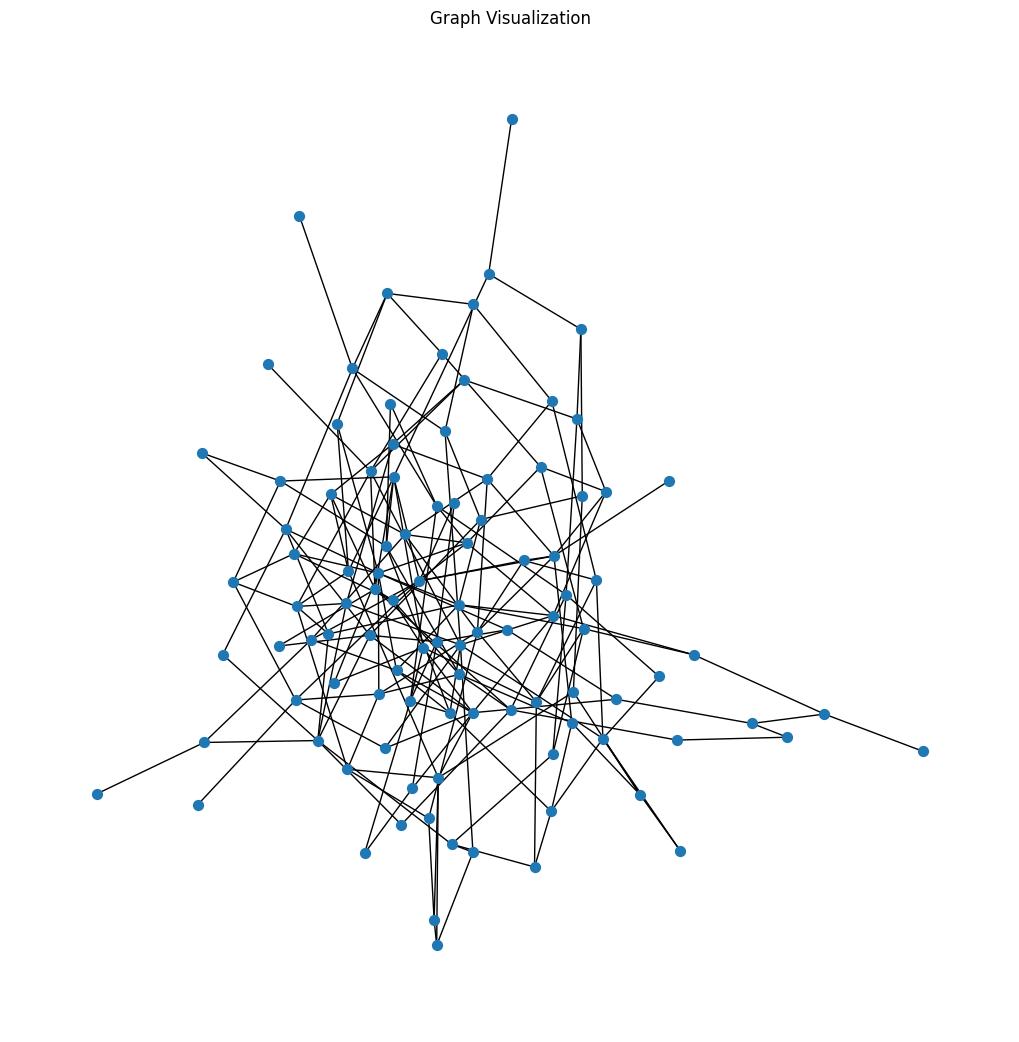

In [9]:
# Create a graph using NetworkX
G = nx.Graph()

# Add edges to the graph
for i in range(num_vertices):
    for j in adj_list[i]:
        if i < j:  # To avoid duplicate edges
            G.add_edge(i, j)

# Visualize the graph
plt.figure(figsize=(10, 10))
nx.draw(G, node_size=50, with_labels=False)
plt.title("Graph Visualization")
plt.show()


***1. Adjacency Matrix:***
   - Useful for dense graphs.
   - Allows constant-time edge checks between two vertices.
   - Consumes O(V^2) memory, which can be inefficient for large sparse graphs.

***2. Adjacency List:***
   - More memory-efficient for sparse graphs.
   - Ideal for iterating through neighbors of a vertex.
   - Edge checks take O(degree of vertex) time.

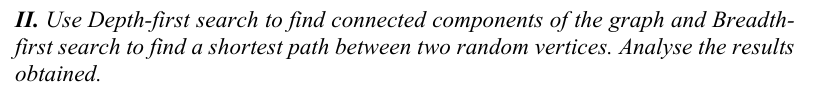

# 1. Depth-First Search to Find Connected Components

In [11]:
# Function to find connected components using DFS
def dfs_connected_components(adj_list):
    visited = set()
    components = []

    def dfs(vertex, component):
        visited.add(vertex)
        component.append(vertex)
        for neighbor in adj_list[vertex]:
            if neighbor not in visited:
                dfs(neighbor, component)

    for vertex in adj_list:
        if vertex not in visited:
            component = []
            dfs(vertex, component)
            components.append(component)

    return components

# Find connected components
connected_components = dfs_connected_components(adj_list)

# Print results
print(f"Number of connected components: {len(connected_components)}")
print("First 5 connected components:")
for i, component in enumerate(connected_components[:5]):
    print(f"Component {i + 1}: {component}")

Number of connected components: 1
First 5 connected components:
Component 1: [0, 61, 32, 19, 21, 27, 7, 11, 6, 17, 4, 31, 46, 43, 10, 9, 63, 28, 23, 12, 53, 56, 81, 72, 2, 13, 45, 44, 90, 92, 30, 80, 5, 14, 16, 66, 8, 38, 22, 62, 47, 36, 78, 37, 15, 41, 40, 1, 50, 18, 52, 70, 54, 68, 58, 26, 48, 74, 49, 34, 3, 35, 97, 76, 88, 89, 79, 95, 75, 94, 82, 87, 25, 67, 77, 86, 93, 57, 96, 24, 59, 29, 55, 39, 64, 73, 98, 20, 33, 99, 65, 83, 91, 69, 71, 84, 60, 42, 51, 85]


# 2. Breadth-First Search to Find the Shortest Path

In [12]:
from collections import deque

# Function to find the shortest path using BFS
def bfs_shortest_path(adj_list, start, target):
    visited = set()
    queue = deque([(start, [start])])  # Store (current_vertex, path_so_far)

    while queue:
        current_vertex, path = queue.popleft()

        if current_vertex == target:
            return path

        if current_vertex not in visited:
            visited.add(current_vertex)
            for neighbor in adj_list[current_vertex]:
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))

    return None  # Return None if no path exists

# Select two random vertices
start_vertex, target_vertex = np.random.choice(num_vertices, 2, replace=False)
print(f"Finding shortest path between vertex {start_vertex} and vertex {target_vertex}")

# Find the shortest path using BFS
shortest_path = bfs_shortest_path(adj_list, start_vertex, target_vertex)

# Print results
if shortest_path:
    print(f"Shortest path from {start_vertex} to {target_vertex}: {shortest_path}")
    print(f"Path length: {len(shortest_path) - 1}")
else:
    print(f"No path exists between vertex {start_vertex} and vertex {target_vertex}")

Finding shortest path between vertex 10 and vertex 64
Shortest path from 10 to 64: [10, 9, 63, 64]
Path length: 3


***Number of Connected Components: 1***

The entire graph forms a single connected component, meaning all 100 vertices are reachable from any other vertex. This indicates that the graph, while sparse (200 edges among 100 vertices), has enough connections to maintain overall connectivity.

***Structure of the Connected Component:***

The single connected component includes all vertices (0 through 99). This suggests that the random distribution of edges resulted in a graph where no isolated clusters or vertices exist.

***Vertices Chosen:***

The BFS algorithm was tasked with finding the shortest path between vertex 10 (start) and vertex 64 (target).

***Path Found:***

The shortest path is [10, 9, 63, 64] with a length of 3 edges. This means that it takes only three "steps" to traverse from vertex 10 to vertex 64.

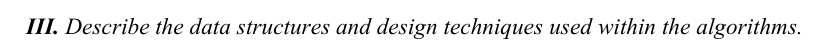

# Depth-First Search (DFS):

**Data Structures:**

*Adjacency List:*

Efficient for storing and traversing sparse graphs.
Visited Set: Tracks explored vertices to avoid revisits.
Recursive Call Stack: Used for backtracking during graph traversal.

*Design Technique: *

Explores neighbors deeply before backtracking, identifying connected components effectively.

# Breadth-First Search (BFS):

**Data Structures:**

*Adjacency List:* Provides quick access to neighbors.
Visited Set: Ensures each vertex is processed once.

*Queue (FIFO):* Enables level-by-level traversal for shortest path discovery.

**Design Technique:**

*Level-Order Traversal:* Explores all neighbors of a vertex at the same "level" before moving deeper, guaranteeing the shortest path in unweighted graphs.